In [21]:
import math as m
from scipy import linalg
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [22]:
n = 60
a, b = 1.1, 2.5
alfa = 0.4

In [23]:
def f(x):
    return(0.5*m.cos(2*x)*m.exp(2*x/5) + 2.4*m.sin(1.5*x)*m.exp((-6)*x) + 6*x)

def poid(k):
    t = b-a
    return((1/(k-alfa+1))*(pow(t, k-alfa+1)))

def I(k, odds, split):
    result = 0
    for i in range(0, k):
        result += odds[i]*f(split[i])
    return result

def func(x):
    return(f(x)*pow(1/(x-a), alfa))

def abs_coef(odds):
    sum = 0
    for odd in odds:
        sum += abs(odd)
    return sum

def poid_matrix(poids, k):
    row = []
    matrix = []
    for s in range(0, k):
        for j in range (0, k):
            row.append(poids[s+j])
        matrix.append(row)
        row = []
    return matrix

In [24]:
dots = np.linspace(a, b, 1000)
values = [f(x) for x in dots]
f_values = [func(x) for x in dots]

In [25]:
result = integrate.quad(lambda x: func(x), a, b)
result

(18.602947857320192, 2.0768453623531968e-10)

### Построение кф типа Ньютона-Котеса 

In [26]:
I_values_n = []
abs_coef_values_n = []

In [27]:
for l in range(1, n):
    even_dots = np.linspace(a, b, l)
    even_values = [f(x) for x in even_dots]

    poids_n = [poid(i) for i in range(0, l)]

    Q = np.vander(even_dots - a, l, increasing = True).T

    coefs_n = linalg.solve(Q, poids_n)
    
    I_values_n.append(I(l, coefs_n, even_dots))
    
    abs_coef_values_n.append(abs_coef(coefs_n))

### Построение кф типа Гаусса

In [28]:
I_values_g = []
abs_coef_values_g = []

In [29]:
for l in range(1, n):
    poids_g = [poid(i) for i in range(0, 2*l)]
    
    negative_poids = [-p for p in poids_g[len(poids_g)//2:]]
    poids_for_system = [p for p in poids_g[:len(poids_g)//2]]    
    
    poid_matrix_g = poid_matrix(poids_g, l)
    
    poli_coefs = linalg.solve(poid_matrix_g, negative_poids)
    poli_coefs = np.append(poli_coefs, 1)[::-1]
    poli_dots = np.roots(poli_coefs)[::-1]
    
    Q = np.vander(poli_dots, l, increasing = True).T

    coefs_g = linalg.solve(Q, poids_for_system)

    I_values_g.append(I(l, coefs_g, poli_dots + a))
    
    abs_coef_values_g.append(abs_coef(coefs_g))

### РисУноЧки и вспомогательные действия

In [30]:
anomalies = [dot for dot in range(1, n-1) if abs(I_values_g[dot])>10**2]#ДЕЛАТЬ НЕЧЕГО МНЕ
for i in anomalies:
    I_values_g[i] = I_values_g[i-1] if (I_values_g[i-1] not in anomalies) else  I_values_g[i-2]#КОСТЫЛИ ЖЕСТЬ ПРОСТО 
anomal_values = [I_values_g[x] for x in anomalies]

In [31]:
I_values_n = np.array(I_values_n)
I_values_g = np.array(I_values_g)

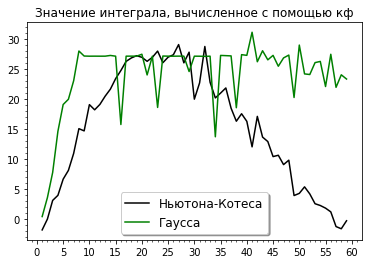

In [37]:
fig, ax = plt.subplots()

ax.plot(range(1, n), (-1)*(np.log(abs(I_values_n - result[0]))), label = 'Ньютона-Котеса', c = 'black')
ax.plot(range(1, n), (-1)*(np.log(abs(I_values_g - result[0]))), label = 'Гаусса', c = 'g')
ax.scatter(anomalies, anomal_values, c = 'r')
#ax.text(10, -12500, 'I-value = 18.6029')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.minorticks_on()
ax.set_title('Значение интеграла, вычисленное с помощью кф')
ax.legend(loc='lower center', shadow=True, fontsize=12)

In [33]:
#БЛОК ЗАБАВ ы
#abs_coef_values_n = np.log(np.array(abs_coef_values_n))
#abs_coef_values_g = np.log(np.array(abs_coef_values_g))

real_indicies = []
for i in range(0, n-1):
    if np.iscomplex(I_values_g[i]) == False:
        real_indicies.append(i)
real_values = [abs_coef_values_g[x] for x in real_indicies]

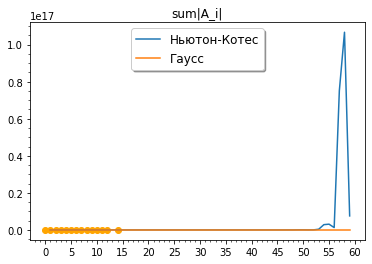

In [34]:
fig, ax = plt.subplots()

ax.plot(range(1, n), abs_coef_values_n, label = 'Ньютон-Котес')
ax.plot(range(1, n), abs_coef_values_g, label = 'Гаусс')
ax.scatter(real_indicies, real_values, c = 'orange')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.minorticks_on()
ax.set_title('sum|A_i|')
ax.legend(loc='upper center', shadow=True, fontsize=12)

In [35]:
I_values_g

array([17.94348079+0.00000000e+00j, 18.6309522 +0.00000000e+00j,
       18.60251778+0.00000000e+00j, 18.60294831+0.00000000e+00j,
       18.60294785+0.00000000e+00j, 18.60294786+0.00000000e+00j,
       18.60294786+0.00000000e+00j, 18.60294786+0.00000000e+00j,
       18.60294786+0.00000000e+00j, 18.60294786+0.00000000e+00j,
       18.60294786+0.00000000e+00j, 18.60294786+0.00000000e+00j,
       18.60294786+0.00000000e+00j, 18.60294786+1.00974196e-28j,
       18.60294786+0.00000000e+00j, 18.60294771+1.90605937e-23j,
       18.60294786+1.23259516e-32j, 18.60294786+6.89549649e-31j,
       18.60294786+2.15704154e-32j, 18.60294786+1.04185867e-29j,
       18.60294786+1.29087504e-26j, 18.60294786-5.13067737e-31j,
       18.60294785-3.70394859e-25j, 18.60294786+2.51923192e-29j,
       18.60294786-2.14365632e-30j, 18.60294786-3.28159203e-30j,
       18.60294786+1.63992588e-29j, 18.60294786+8.73293739e-30j,
       18.60294786-1.29105553e-26j, 18.60294786+2.84909798e-29j,
       18.60294786-9.4515

In [36]:
I_values_n

array([12.53557469, 19.60183522, 18.55804138, 18.58361279, 18.6042553 ,
       18.60325185, 18.60292975, 18.60294756, 18.60294828, 18.60294786,
       18.60294784, 18.60294785, 18.60294786, 18.60294786, 18.60294786,
       18.60294786, 18.60294786, 18.60294786, 18.60294786, 18.60294786,
       18.60294786, 18.60294786, 18.60294786, 18.60294786, 18.60294786,
       18.60294786, 18.60294786, 18.60294786, 18.60294786, 18.60294786,
       18.60294786, 18.60294786, 18.60294786, 18.60294786, 18.60294786,
       18.60294786, 18.60294787, 18.60294794, 18.60294788, 18.60294777,
       18.60295393, 18.60294782, 18.60294666, 18.60294535, 18.6029172 ,
       18.60292329, 18.6028315 , 18.60300353, 18.5829918 , 18.58903288,
       18.59824149, 18.61826464, 18.52515922, 18.70760961, 18.76512447,
       18.3010834 , 22.07628465, 13.58868045, 19.92826275])

### Реализация составной квадратурной формулы